<a href="https://colab.research.google.com/github/Shruti-GiriK/Projects/blob/main/Food_Prices_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Food Price Information Dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

---
**About this dataset**
---
This data contains values stretched over 30 years regarding the food prices of each commodity.Various values regarding the administrator, the coordinates, market where the item is sold, Category, Commodity, Unit, Flagged price, Price type,and Value price.

---
**Problem Statement**
Due to the ever-rising inflation over the years, its important to understand and predict the future prices of basic commodities. The varying prices also ranges from place to place,the prcies increading due to the demand in the highly populated places.  

---

**Understanding the columns**
---
1. **date**: The dates across 30 years from 1994 to 2024
2. **admin1**: Administrator 1
3. **admin2**: Administrator 2
4. **market**: Market where it is sold in
5. **latitude**: The Horizontal coordinates
6. **longitude**: The Vertical coordinates
7. **Category** : The type of item which is sold
8. **Commodity**: The item which is sold.
9. **Unit** : Weight of the item is sold.
10. **price flag**:The Actual prices.
11. **pricetype**:Whether sold as wholesale or retail
12. **currency**: The type of currency the transaction is done in.
13. **price**: The value of the commodity.
14. **usdprice**:Unit sale price

# **1. Understanding the Data**

In [ ]:
df=pd.read_csv('/content/RAW File - ind-food-prices.csv')
df

<ipython-input-3-c4782c1975a3>:1: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/RAW File - ind-food-prices.csv')


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.1594
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4303
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.988
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176790,2024-02-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,pulses and nuts,Lentils (masur),KG,actual,Retail,INR,94.3,1.1363
176791,2024-02-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,pulses and nuts,Lentils (moong),KG,actual,Retail,INR,112.71,1.3581
176792,2024-02-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,pulses and nuts,Lentils (urad),KG,actual,Retail,INR,118.43,1.427
176793,2024-02-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,vegetables and fruits,Onions,KG,actual,Retail,INR,30.51,0.3676


In [ ]:
df['currency'].unique()

array(['#currency', 'INR'], dtype=object)

In [ ]:
df['category'].unique()

array(['#item+type', 'cereals and tubers', 'miscellaneous food',
       'oil and fats', 'pulses and nuts', 'vegetables and fruits',
       'milk and dairy'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176795 entries, 0 to 176794
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       176795 non-null  object
 1   admin1     176193 non-null  object
 2   admin2     176193 non-null  object
 3   market     176795 non-null  object
 4   latitude   176193 non-null  object
 5   longitude  176193 non-null  object
 6   category   176795 non-null  object
 7   commodity  176795 non-null  object
 8   unit       176795 non-null  object
 9   priceflag  176795 non-null  object
 10  pricetype  176795 non-null  object
 11  currency   176795 non-null  object
 12  price      176795 non-null  object
 13  usdprice   176795 non-null  object
dtypes: object(14)
memory usage: 18.9+ MB


In [ ]:
df['unit'].unique()

array(['#item+unit', 'KG', '100 KG', 'L'], dtype=object)

In [ ]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [date, admin1, admin2, market, latitude, longitude, category, commodity, unit, priceflag, pricetype, currency, price, usdprice]
Index: []


In [ ]:
df.shape

(176795, 14)

In [ ]:
df['pricetype'].unique()

array(['#item+price+type', 'Retail', 'Wholesale'], dtype=object)

176795 rows and 14 columns.

In [ ]:
df['unit'].unique()

array(['#item+unit', 'KG', '100 KG', 'L'], dtype=object)

# **2.Data Cleaning**

In [ ]:
df.drop([0],axis=0,inplace=True)

In [ ]:
df.drop('priceflag',axis=1,inplace=True)

In [ ]:
df.drop('currency',axis=1,inplace=True) #Dropping currency columns as it has one value through

In [ ]:
df['price']=df['price'].astype(float)
df['longitude']=df['longitude'].astype(float)
df['latitude']=df['latitude'].astype(float)


In [ ]:
df.drop('usdprice',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
date,0
admin1,602
admin2,602
market,0
latitude,602
longitude,602
category,0
commodity,0
unit,0
pricetype,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
date,0
admin1,0
admin2,0
market,0
latitude,0
longitude,0
category,0
commodity,0
unit,0
pricetype,0


# **3.Descriptive Statistics**

In [ ]:
df.describe()

,latitude,longitude,price
count,176192.000000,176192.000000,176192.000000
mean,22.416387,80.240047,93.167468
std,6.208832,5.649566,213.989911
min,8.506944,69.666690,2.500000
25%,18.866667,76.283333,27.810000
50%,23.350000,78.157870,52.000000
75%,26.716111,84.903620,107.000000
max,32.553589,94.116667,4900.000000


# **4.Data Visualization**

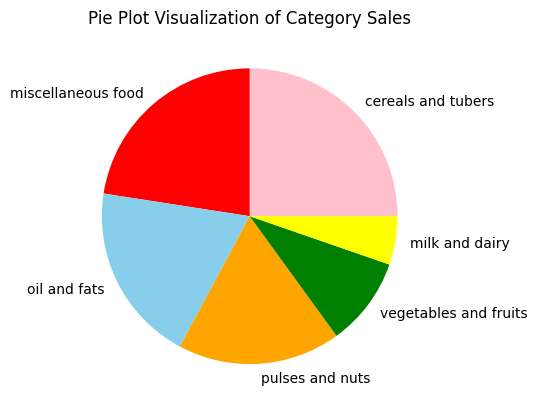

In [ ]:
df['category'].value_counts().plot.pie(colors=['pink','red','skyblue','orange','green','yellow'],
                                       labels=['cereals and tubers', 'miscellaneous food', 'oil and fats',
       'pulses and nuts', 'vegetables and fruits', 'milk and dairy'])
plt.ylabel('')
plt.title('Pie Plot Visualization of Category Sales')
plt.show()

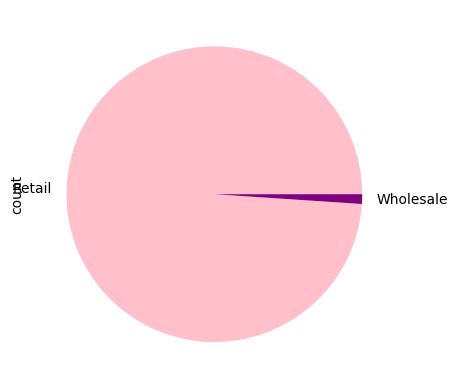

In [ ]:
df['pricetype'].value_counts().plot.pie(colors=['pink','purple'],
                                   labels=['Retail','Wholesale'])
plt.show()

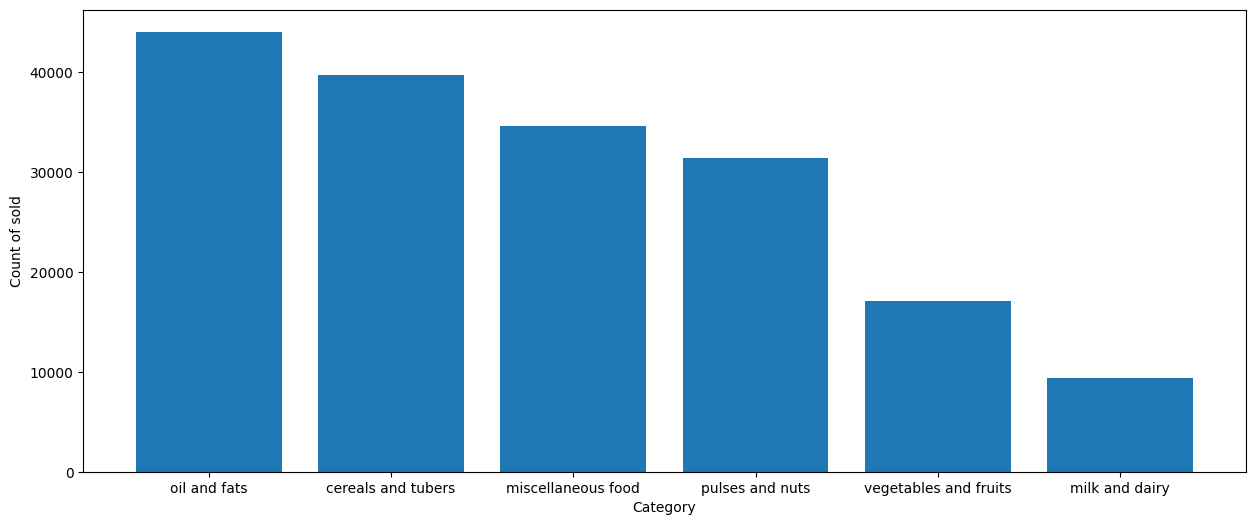

In [ ]:
plt.figure(figsize=(15,6))
count=df['category'].value_counts()
plt.bar(count.index,count)
plt.xlabel('Category')
plt.ylabel('Count of sold')
plt.show()

<Axes: xlabel='pricetype', ylabel='price'>

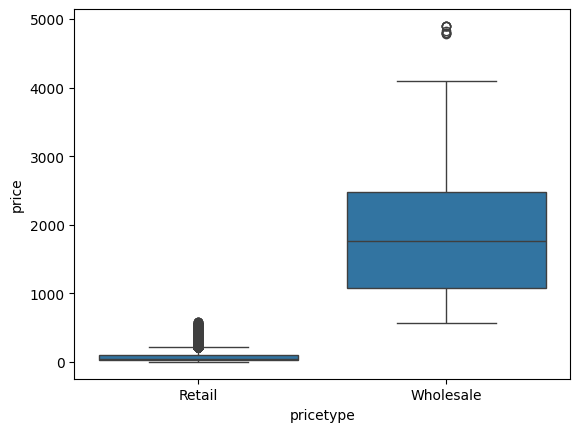

In [ ]:
sns.boxplot(x='pricetype',y='price',data=df)

<Axes: xlabel='unit', ylabel='price'>

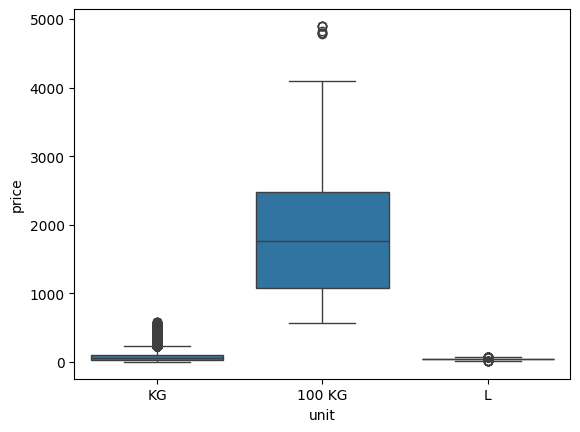

In [ ]:

sns.boxplot(x='unit',y='price',data=df)

# **5. Feature Engineering**

If we try to convert date column into labels , the result will be difficult to find out as the value will range from 1 to 170000. So we create new features based on the date column.

In [ ]:
df['Date']=pd.to_datetime(df['date'])
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df['DayofWeek']=df['Date'].dt.dayofweek

df.drop('date',axis=1,inplace=True)

In [ ]:
df

,admin1,admin2,market,latitude,longitude,category,commodity,unit,pricetype,price,Date,Month,Year,DayofWeek
1,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,Retail,5.00,1994-01-15,1,1994,5
2,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,Retail,13.50,1994-01-15,1,1994,5
3,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,Retail,31.00,1994-01-15,1,1994,5
4,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,Retail,6.80,1994-01-15,1,1994,5
5,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Wheat,KG,Retail,6.20,1994-01-15,1,1994,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176790,Rajasthan,Jaipur,North Zone,26.938848,75.800056,pulses and nuts,Lentils (masur),KG,Retail,94.30,2024-02-15,2,2024,3
176791,Rajasthan,Jaipur,North Zone,26.938848,75.800056,pulses and nuts,Lentils (moong),KG,Retail,112.71,2024-02-15,2,2024,3
176792,Rajasthan,Jaipur,North Zone,26.938848,75.800056,pulses and nuts,Lentils (urad),KG,Retail,118.43,2024-02-15,2,2024,3
176793,Rajasthan,Jaipur,North Zone,26.938848,75.800056,vegetables and fruits,Onions,KG,Retail,30.51,2024-02-15,2,2024,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176192 entries, 1 to 176794
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   admin1     176192 non-null  object        
 1   admin2     176192 non-null  object        
 2   market     176192 non-null  object        
 3   latitude   176192 non-null  float64       
 4   longitude  176192 non-null  float64       
 5   category   176192 non-null  object        
 6   commodity  176192 non-null  object        
 7   unit       176192 non-null  object        
 8   pricetype  176192 non-null  object        
 9   price      176192 non-null  float64       
 10  Date       176192 non-null  datetime64[ns]
 11  Month      176192 non-null  int32         
 12  Year       176192 non-null  int32         
 13  DayofWeek  176192 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(3), object(7)
memory usage: 18.1+ MB


# **6. Correlational Analysis**

In [ ]:
df['category'].unique()

array(['cereals and tubers', 'miscellaneous food', 'oil and fats',
       'pulses and nuts', 'vegetables and fruits', 'milk and dairy'],
      dtype=object)

In [ ]:
encoder=LabelEncoder()

df['admin1']=encoder.fit_transform (df['admin1'])
df['admin2']=encoder.fit_transform(df['admin2'])
df['market']=encoder.fit_transform(df['market'])
df['commodity']=encoder.fit_transform(df['commodity'])
df['pricetype'].replace(['Retail', 'Wholesale'],[1,2],inplace=True)

df['unit'].replace(['KG','L','100 KG'],[1,1,100],inplace=True)

df['category'].replace(['oil and fats','cereals and tubers','miscellaneous food',
                        'pulses and nuts','vegetables and fruits','milk and dairy'],[1,2,3,4,5,6],inplace=True)



<ipython-input-30-5c62d081cfa1>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pricetype'].replace(['Retail', 'Wholesale'],[1,2],inplace=True)
<ipython-input-30-5c62d081cfa1>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['pricetype'].replace(['Retail', 'Wholesale'],[1,2],inplace=True)
<i

In [ ]:
df

,admin1,admin2,market,latitude,longitude,category,commodity,unit,pricetype,price,Date,Month,Year,DayofWeek
1,6,41,42,28.666667,77.216667,2,21,1,1,5.00,1994-01-15,1,1994,5
2,6,41,42,28.666667,77.216667,3,17,1,1,13.50,1994-01-15,1,1994,5
3,6,41,42,28.666667,77.216667,1,9,1,1,31.00,1994-01-15,1,1994,5
4,8,2,3,23.033333,72.616667,2,15,1,1,6.80,1994-01-15,1,1994,5
5,8,2,3,23.033333,72.616667,2,21,1,1,6.20,1994-01-15,1,1994,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176790,23,67,110,26.938848,75.800056,4,3,1,1,94.30,2024-02-15,2,2024,3
176791,23,67,110,26.938848,75.800056,4,4,1,1,112.71,2024-02-15,2,2024,3
176792,23,67,110,26.938848,75.800056,4,5,1,1,118.43,2024-02-15,2,2024,3
176793,23,67,110,26.938848,75.800056,5,13,1,1,30.51,2024-02-15,2,2024,3


In [ ]:
corr=df.corr()
corr

,admin1,admin2,market,latitude,longitude,category,commodity,unit,pricetype,price,Date,Month,Year,DayofWeek
admin1,1.000000,0.007180,-0.102010,0.006450,0.015893,-0.003748,0.004486,-0.042587,-0.042587,-0.036031,-0.015754,0.001169,-0.015786,-0.002583
admin2,0.007180,1.000000,0.645707,-0.075137,0.050740,0.010120,-0.015855,-0.006665,-0.006665,0.001322,0.095647,-0.005883,0.095750,-0.007288
market,-0.102010,0.645707,1.000000,-0.157413,0.017219,0.005741,-0.014335,-0.012845,-0.012845,-0.003027,0.080814,0.000684,0.080583,-0.001486
latitude,0.006450,-0.075137,-0.157413,1.000000,0.078355,-0.003310,-0.000362,-0.009819,-0.009819,-0.020656,-0.011785,0.001839,-0.011858,0.001263
longitude,0.015893,0.050740,0.017219,0.078355,1.000000,0.001978,0.006588,-0.045072,-0.045072,-0.042727,0.008465,0.005380,0.008146,-0.001494
category,-0.003748,0.010120,0.005741,-0.003310,0.001978,1.000000,-0.105121,-0.046706,-0.046706,-0.112543,0.074116,0.002253,0.073815,-0.001243
commodity,0.004486,-0.015855,-0.014335,-0.000362,0.006588,-0.105121,1.000000,0.096501,0.096501,-0.010662,-0.129504,0.003670,-0.129403,0.003275
unit,-0.042587,-0.006665,-0.012845,-0.009819,-0.045072,-0.046706,0.096501,1.000000,1.000000,0.859431,-0.152541,0.000764,-0.152220,0.001549
pricetype,-0.042587,-0.006665,-0.012845,-0.009819,-0.045072,-0.046706,0.096501,1.000000,1.000000,0.859431,-0.152541,0.000764,-0.152220,0.001549
price,-0.036031,0.001322,-0.003027,-0.020656,-0.042727,-0.112543,-0.010662,0.859431,0.859431,1.000000,-0.002670,0.003079,-0.002834,-0.000835


<Axes: >

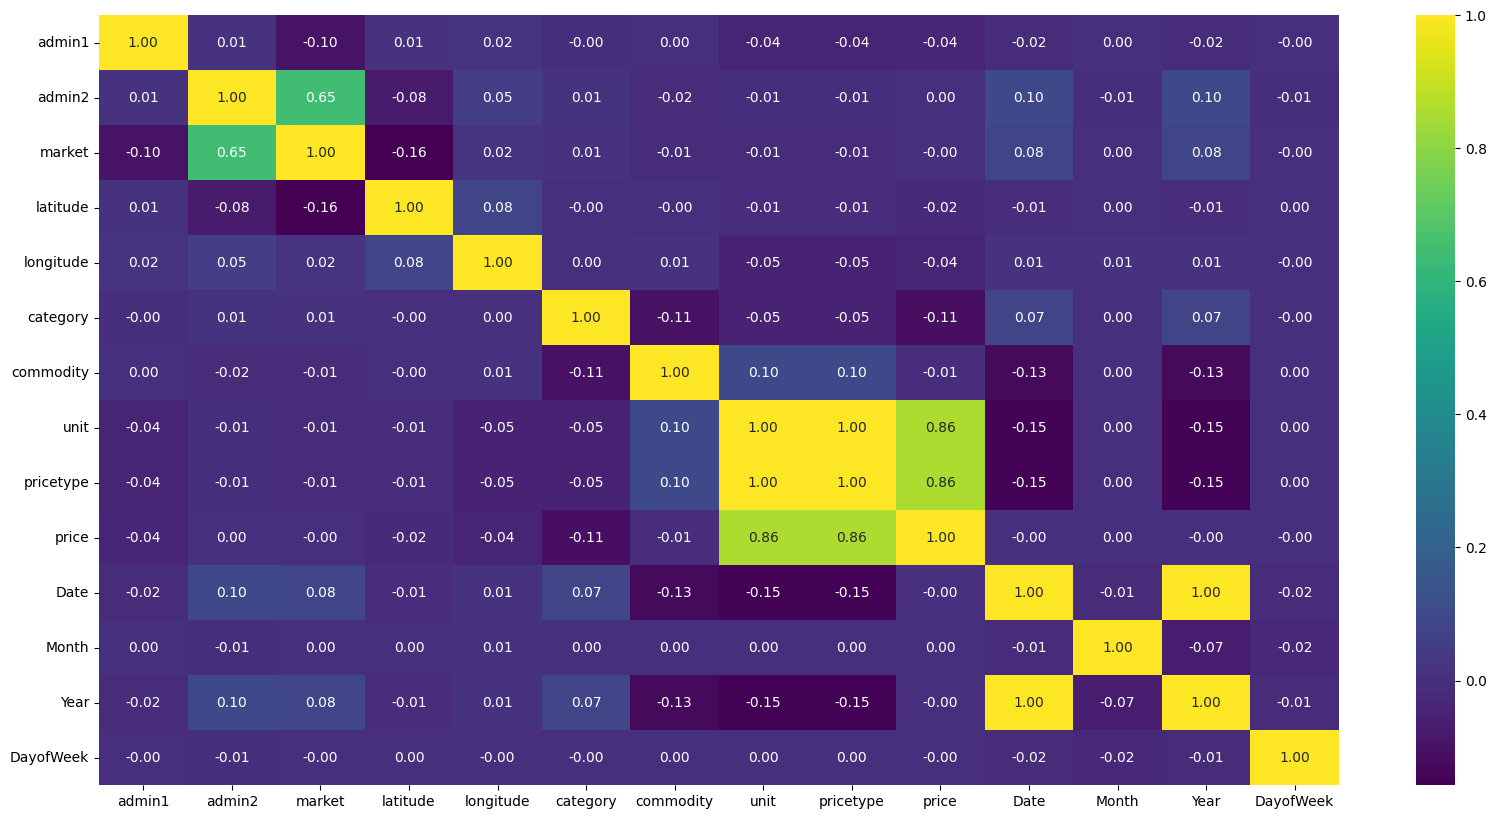

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,fmt='0.2f',cmap='viridis',annot=True)

In [ ]:
df.drop(['admin2','market','commodity',
         'Date','Month','Year','DayofWeek'],axis=1,inplace=True)

In [ ]:
X=df.drop(['price'],axis=1)
y=df.price
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.7513662832287473

# **7.Outlier Removal**

<Axes: >

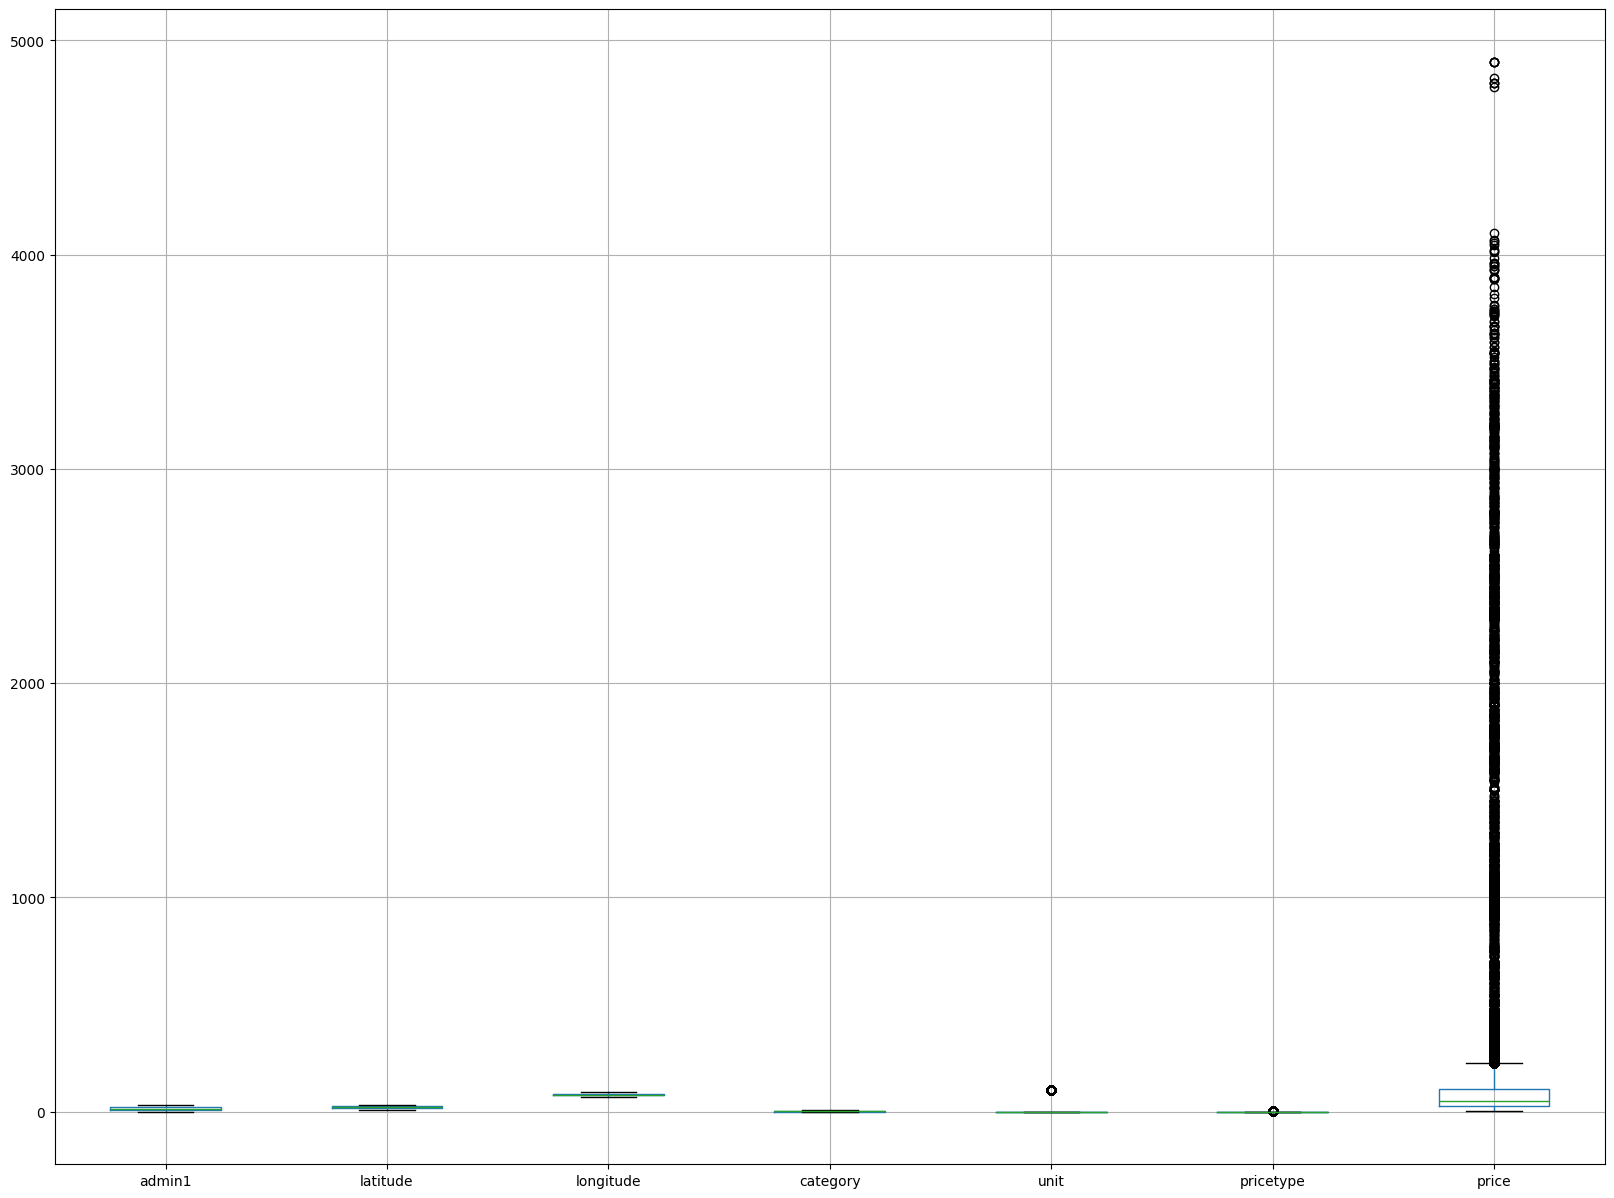

In [ ]:
plt.figure(figsize=(20,15))
df.boxplot()

The score of the outlier removed model is very less as their are very little of the outliers. If we remove them the score will reduce.

# **8. Data Scaling**

### MinMaxScaling

In [ ]:
minmax=MinMaxScaler()
x_minmax=minmax.fit_transform(X)
X_trainm,X_testm,y_trainm,y_testm=train_test_split(x_minmax,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_trainm,y_trainm)
model.score(X_testm,y_testm)

0.7513662832287473

### StandardScaling

In [ ]:
standard=StandardScaler()
x_stand=standard.fit_transform(X)
X_trains,X_tests,y_trains,y_tests=train_test_split(x_stand,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_trains,y_trains)
model.score(X_tests,y_tests)

0.7513662832287473

Will be taking non -scaled dataframe as the scores are the same.

# **9.Model Training**

In [ ]:
from sklearn.model_selection import KFold

# KFold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

# Track best fold data
best_accuracy = 0
best_fold = -1


# Save best fold's data
best_X_train = None
best_y_train = None
best_X_test = None
best_y_test = None
best_y_pred = None

# Loop over each fold
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    xtrain, xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    model.fit(xtrain,ytrain)

    # Predict
    y_pred = model.predict(xtest)
    r2 = r2_score(ytest, y_pred)
    print(f"Fold {fold} Accuracy: {r2}")

    # Update best fold
    if r2 > best_accuracy:
        best_accuracy = r2
        best_fold = fold
        best_X_train = xtrain
        best_y_train = ytrain
        best_X_test = xtest
        best_y_test = ytest
        best_y_pred = y_pred

# Output best fold details
print(f"\n Best Fold: {best_fold} with Accuracy: {best_accuracy}")

Fold 1 Accuracy: 0.7513662832287472
Fold 2 Accuracy: 0.75151802783924
Fold 3 Accuracy: 0.7309655417307137
Fold 4 Accuracy: 0.7517737120566343
Fold 5 Accuracy: 0.7314767590117366

 Best Fold: 4 with Accuracy: 0.7517737120566343


In [ ]:
Linear=LinearRegression()
Linear.fit(best_X_train,best_y_train)
Linear.score(best_X_test,best_y_test)

0.7517737120566343

In [ ]:
Tree_model=DecisionTreeRegressor()
Tree_model.fit(best_X_train,best_y_train)
Tree_model.score(best_X_test,best_y_test)

0.8524653119020356

In [ ]:
forest_model=RandomForestRegressor()
forest_model.fit(best_X_train,best_y_train)
forest_model.score(best_X_test,best_y_test)

0.8524553366697897

In [ ]:
y_pred=forest_model.predict(best_X_test)
y_pred

array([ 58.81451454, 115.40010882,  92.78894027, ..., 115.60484768,
        73.51956639,  43.48859845])

In [ ]:
r2__forest=r2_score(best_y_test,y_pred)
r2__forest

0.8524553366697897

# **10. Report**

In [ ]:
mse = mean_squared_error(best_y_test, y_pred)
mse

7210.456836286411

**REPORT**:
1. The Model chosen for predicting the price is RandomForestRegressor with a good r2_score, leading to significantly less errors.
2. The mse calculated is aroun 7000 a good error score for our target price range from 2.5 to 4900.

# **Storing as Pickle file**

In [ ]:
import pickle

In [ ]:
filename='food_price_rfmodel.pkl'
with open(filename,'wb') as file:
  pickle.dump(forest_model,file)

In [ ]:
with open('food_price_rfmodel.pkl','rb') as file:
  load_model=pickle.load(file)